In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [18]:
data= pd.read_csv('C:\\Users\\user\\Downloads\\bank-full.csv', sep=';',dtype='str')

In [19]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  object
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  object
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  object
 10  month      45211 non-null  object
 11  duration   45211 non-null  object
 12  campaign   45211 non-null  object
 13  pdays      45211 non-null  object
 14  previous   45211 non-null  object
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: object(17)
memory usage: 5.9+ MB


In [24]:
df=pd.get_dummies(data,columns=['job','marital','education','contact','poutcome','month'])
df

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  object
 1   default              45211 non-null  object
 2   balance              45211 non-null  object
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  object
 6   duration             45211 non-null  object
 7   campaign             45211 non-null  object
 8   pdays                45211 non-null  object
 9   previous             45211 non-null  object
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

In [32]:
# Custom Binary Encoding of Binary o/p variables 
df['default'] = np.where(df['default'].str.contains("yes"), 1, 0)
df['housing'] = np.where(df['housing'].str.contains("yes"), 1, 0)
df['loan'] = np.where(df['loan'].str.contains("yes"), 1, 0)
df['y'] = np.where(df['y'].str.contains("yes"), 1, 0)
df

In [30]:
df.isna().sum()

age                    0
default                0
balance                0
housing                0
loan                   0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_cellular       0
contact_telephone      0
contact_unknown        0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
month_apr              0
month_aug              0
month_dec              0


In [31]:
x=pd.concat([df.iloc[:,0:10],df.iloc[:,11:]],axis=1)
y=df.iloc[:,10]

In [33]:
classifier=LogisticRegression()

In [34]:
classifier.fit(x,y)

C:\Users\user\Downloads\anaconda_sri\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_pred=classifier.predict(x)

In [36]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted_prob': classifier.predict(x)})

In [37]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [38]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[39156   766]
 [ 4122  1167]]


In [39]:
accuracy=(39156+1167)/(39156+766+4122+1167)

In [40]:
accuracy

0.8918847183207627

In [41]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



Text(0, 0.5, 'True Positive Rate')

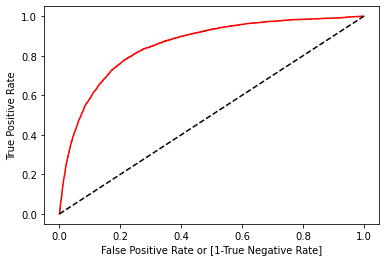

In [42]:
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
auc = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr, color='red',label='logit model(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1-True Negative Rate]')
plt.ylabel('True Positive Rate')

In [43]:
auc

0.6007296048053773